# Transformation Tutorial 


This tutorial shows linear geometric transformations using Numpy and covers transformations of a single and multiple 2D and 3D points.  
The tutorial assumes that you have read the theoretical reading material before reading this since all details will not be provided here. For example this tutorial assumes prior knowledge of matrix and vector representations, multiplication. Notice that it is straight forward to extend many of these transformations to $N$ dimensions.
The tutorial covers the following topics:

1. Rotation, scaling and shearing of one or several points 
2. Rotations around a point
3. 3D rotations around individual axes and 3D Scaling 
4. Show that matrix multiplication does not commute ($ AB \neq BA$). This will be shown using 3d rotations around x,y,z
5. Affine transformation by rotation and translation in Euclidean coordiates
6. Mapping between Eucledian and homogenious representations
7. Affine transformation at homogeneous coordinates


Recall, linear transformations leave the origin fixed and preserve parallelism. Scaling, shearing, rotation and reflection of a plane are examples of linear transformations.



##  Vector and matrix of points

We define  a 2D point $p=\begin{bmatrix} 1 \\ 2 \end{bmatrix}$ and the matrix $A =\begin{bmatrix} 0 & 1 & 0 & -1\\
              1 & -1 & -1 & 0 \end{bmatrix}$ where each column is considered a separate point.

In [37]:
import numpy as np
# single 2d point
p=np.array([1,2])

# matrix with row vectors of points
A = np.array([(0, 1),
              (1, 0), 
              (0, -1), 
              (-1, 0)]).transpose()

print("p=",p)
print("A=",A)


p= [1 2]
A= [[ 0  1  0 -1]
 [ 1  0 -1  0]]


## Transformations and matrix multiplication 
 Matrix multiplication is used to transform points via a rotation, scaling or shearing  
$p_t=T* p$,  where $T$ is a transformation matrix and $p$ is a arbitrary point. 

### Rotation
The  (anticlockwise) rotation matrix ($T_R$) around the origin in two dimensions is given by:

$$T_R = \left[
	\begin{array}{r r}
		\cos(\theta) & -\sin(\theta)\\
		\sin(\theta) & \cos(\theta)
	\end{array}
\right],$$

where $\theta$ is the rotation angle around the origin $(0, 0)$.

 The following lines of code rotates the point $p$ 90 degree around the origin. 

In [38]:
# rotation 90 degree 
R = np.array([[0, 1], [-1, 0]])
r_p=np.dot(R,p)
print("original point: \n",p)
print("rotated point: \n",r_p)

original point: 
 [1 2]
rotated point: 
 [ 2 -1]


In [39]:

# Rotation with angle theta
angle = 30
theta = np.radians(angle)
R_theta = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
print('Rotation matrix \n',R_theta)
print(p)
print("Rotated P", R_theta.dot(p) ) # Notice matrix multiplication is done on the matrix


#Rotation of multiple points using matrix multiplication
A_prime= R_theta.dot(A) #rotate the points in A around the origin through matrix multiplication with T_r
print("Points before rotation \n", A) #Printing such that each point is on one row.. Hence transposing the matrix
print("Points after rotation \n", A_prime.transpose())

Rotation matrix 
 [[ 0.866 -0.5  ]
 [ 0.5    0.866]]
[1 2]
Rotated P [-0.134   2.2321]
Points before rotation 
 [[ 0  1  0 -1]
 [ 1  0 -1  0]]
Points after rotation 
 [[-0.5    0.866]
 [ 0.866  0.5  ]
 [ 0.5   -0.866]
 [-0.866 -0.5  ]]


It may be easier to see what happens in the rotation if the points are plotted in a figure.
The following code snippet is used to plot points in 2D. You may skip the details of the implementation at first reading.


In [40]:
import matplotlib.pyplot as plt
import numpy as np
import math
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)


def plot_points(points,t_points,origin = (0,0)):
    # 
    #  Input:
    #  points : matrix of 2D points 
    #  t_points : matrix of transformed 2D points
    #  origin : it is simply show the origin and is (0,0) by defualt. 
    #  otherpoint: ignore this input it will be used just for rotation around a point 
    
    # Desctiption:
    # Displays the points and t_points in separate subplots and where the points with the same index have the same color 
    
    color_lut = 'rgbcmy'
    fig, (ax1, ax2) = plt.subplots(1, 2)
    xs_t = []
    ys_t = []
    xs = []
    ys = []
    i=0
    
    textOffset=0.15    
    ax1.scatter(origin[0], origin[1], color='k')
    ax1.text(origin[0] + textOffset, origin[1], "o")
    ax2.scatter(origin[0], origin[1], color='k')
    ax2.text(origin[0] + textOffset, origin[1], "o")
        
   
        
    for row,t_row in zip(points.T,t_points.T):
        x_s, y_s = row
        x_s_t, y_s_t = t_row
        xs.append(x_s)
        ys.append(y_s)
        xs_t.append(x_s_t)
        ys_t.append(y_s_t)
        c_s =  color_lut[i] # these are the same but, its good to be explicit
        ax1.scatter(x_s, y_s, color=c_s)
        ax1.text(x_s + textOffset, y_s, str(i))
        ax2.scatter(x_s_t, y_s_t, color=c_s)
        ax2.text(x_s_t + textOffset, y_s_t, str(i))
        i+=1
    xs.append(xs[0])
    ys.append(ys[0])
    xs_t.append(xs_t[0])
    ys_t.append(ys_t[0])
    ax1.plot(xs, ys, color="gray", linestyle='dotted')
    ax1.set_xticks(np.arange(-2.5, 3, 0.5))
    ax1.set_yticks(np.arange(-2.5, 3, 0.5))
    ax2.plot(xs_t, ys_t, color="gray", linestyle='dotted')
    ax2.set_xticks(np.arange(-2.5, 3, 0.5))
    ax2.set_yticks(np.arange(-2.5, 3, 0.5))
    ax1.grid()
    ax2.grid()
    plt.show()
    return 

     

Let us plot the points $A$ and rotated points $A_{prime}$ by using `plot_points`

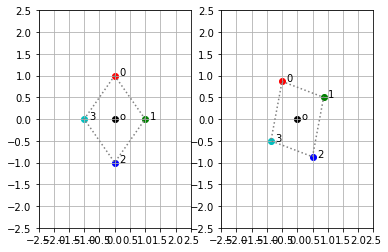

In [41]:
plot_points(A,A_prime)

### Scaling

Right multiplying  a 2D point   $p_s=T_s p$  where matrix $T_S = \left[
	\begin{array}{r r}
		s_x & 0\\
		0 & s_y
	\end{array}
\right],$ will scale the first coordinate of $p$ with $s_x$ and the second coordinate with $s_y$. The following example scales (anisotropically)  the first coordinate  with $2$ and the second coordinate with $3$.  


In [42]:
# scaling tranformation 
T_s = np.array([[2, 0], [0, 3]])
p_s=T_s.dot(p)
print("original point: \n",p)
print("scaled point: \n",p_s)

original point: 
 [1 2]
scaled point: 
 [2 6]


Let us apply scaling transformation $T_s$ to the matrix $A$  ( $A_s=T_sA$ )

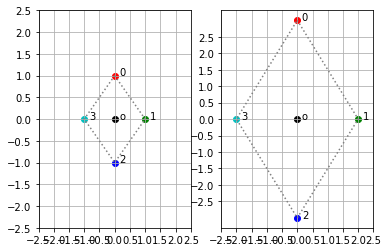

In [43]:
A_s=np.dot(T_s,A)
plot_points(A,A_s)

### Shearing 

The shearing matrices, horizontal shear($Sh_x$)  and  vertical shear ($Sh_y$) in two dimensions is given by:

$$Sh_x = \left[
	\begin{array}{r r}
		1 & sh_x\\
		0 & 1
	\end{array}
\right] $$
$$ Sh_y =\left[
	\begin{array}{r r}
		1 & 0\\
		sh_y & 1
	\end{array}
\right] ,$$

The following example make a shearing of a 2D point $p$. Notice how the points are skewed in the x and y coordinates respectively


Horizontal shear 
 [[1 1]
 [0 1]]


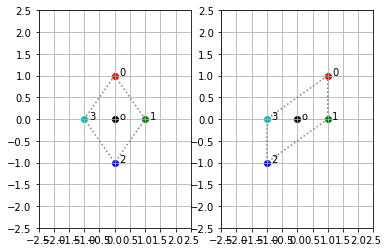

Vertical shear 
 [[1 0]
 [1 1]]


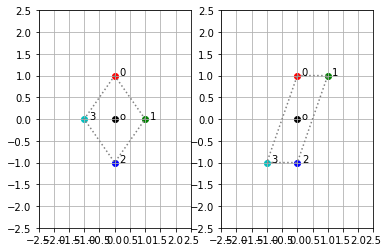

In [44]:

# Horizontal shear 
Sh_x = np.array([[1, 1], [0, 1]])
print('Horizontal shear \n',Sh_x)
p_sx = Sh_x.dot(A)
plot_points(A,p_sx)

# Vertical shear 
Sh_y = np.array([[1, 0], [1, 1]])
p_sy = Sh_y.dot(A)
print('Vertical shear \n',Sh_y)
plot_points(A,p_sy)



## 2D Rotation about a point


Three steps are needed to transform  a point $p_0$ (or matrix of points $A$) around an arbitary point $o_{prime}$
1.  Translate the  the point(s) by $q$ (e.g $A_1=A-o_{prime}$) by essentially defining a "new" origin  
2. Transform translated points $A_2= TA_1$. 
3. Undo the translation by moving the points back $A_3=A_2+o_{prime}$

The following code example shows a 30 degree rotation of matrix $A$ around point $o_{prime}$.
      

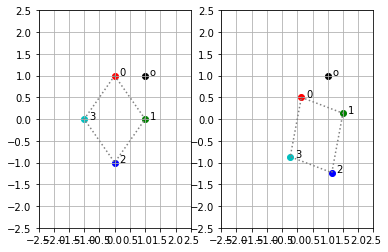

In [45]:
# centered point
o_prime=np.array([1,1])

# Rotation around a point



# STEP 1: translation to the point 
# HAVE comment for repeat 
A_1=A-np.repeat(o_prime,2)

# STEP 2: rotate
A_2=R_theta.dot(A_1)

# STEP 3: reverse tranlation

A_3=A_2+np.repeat(o_prime,2)

#plot
plot_points(A,A_3,o_prime)

#  3D geometric transformations


##  Matrix of points

Similar to what we had in 2D transformation, we define  a matrix $A =\begin{bmatrix} 0 & 1 & 0 & -31\\
              2 & 0 & -1 & 0 \\ 
              0 & 0 & 0 & 0\end{bmatrix}$ where each column is considered a separate  3D point.


In [46]:
#  3d points 
a, b, c, d = (0, 2,0), (1, 0,0), (0, -1,0), (-3, 0 ,0)

# matrix with row vectors of points
A = np.array([a, b, c, d]).T
print('A=',A)

A= [[ 0  1  0 -3]
 [ 2  0 -1  0]
 [ 0  0  0  0]]


### 3D rotation
The following three basic rotation matrices, rotate points by an angle θ about the x-axis, y-axis, and z-axis in three dimensions :

$$Rx = \left[
	\begin{array}{r r r }
		1 & 0 & 0 \\
		0 & \cos(\theta) & -\sin(\theta) \\
        0 &  \sin(\theta) & \cos(\theta) \\
	\end{array}
\right],$$


$$Ry = \left[
	\begin{array}{r r r }
		\cos(\theta) & 0 & \sin(\theta) \\
		0 & 1 & 0 \\
        -\sin(\theta) &  0 & \cos(\theta) \\
	\end{array}
\right],$$


$$Rz = \left[
	\begin{array}{r r r }
		\cos(\theta) & -\sin(\theta) & 0 \\
		\sin(\theta) & \cos(\theta) & 0\\
        0 &  0 & 1 \\
	\end{array}
\right],$$


We use function below to build a 3D rotation matrix. Feel free to study the code.


In [47]:

def get_3d_rotation_matrix(theta, axis=0):
    """
    This function return a rotation matrix given an input theta angle in
    radians.
    """
    if axis == 0:
        return np.array(
            [
                [1, 0, 0],
                [0, math.cos(theta), -math.sin(theta)],
                [0, math.sin(theta), math.cos(theta)],
            ],
            dtype=np.float64,
        )
    elif axis == 1:
        return np.array(
            [
                [math.cos(theta), 0, math.sin(theta)],
                [0, 1, 0],
                [-math.sin(theta), 0, math.cos(theta)],
            ],
            dtype=np.float64,
        )

    return np.array(
        [
            [math.cos(theta), -math.sin(theta), 0],
            [math.sin(theta), math.cos(theta), 0],
            [0, 0, 1],
        ],
        dtype=np.float64,
    )




In the following code we transfrom matrix $A$ by right  multiplying 3d rotation matrices $R_x$, $R_y$ and $R_z$ (around x, y, or z-axis).    

In [48]:

angle = 60
theta = np.radians(angle)
#3d rotation  over X-axis

R_x=get_3d_rotation_matrix(theta, axis=0)
print('3d rotation  over X-axis',angle,'degrees \n',R_x)
P_rx=np.dot(R_x,A)


#3d rotation  over Y-axis
R_y=get_3d_rotation_matrix(theta, axis=1)
print('3d rotation  over Y-axis',angle,'degrees \n',R_y)
P_ry=np.dot(R_y,A)



#3d rotation  over Z-axis
R_z=get_3d_rotation_matrix(theta, axis=2)
print('3d rotation  over Z-axis',angle,'degrees \n',R_z)
P_rz=np.dot(R_z,A)


3d rotation  over X-axis 60 degrees 
 [[ 1.     0.     0.   ]
 [ 0.     0.5   -0.866]
 [ 0.     0.866  0.5  ]]
3d rotation  over Y-axis 60 degrees 
 [[ 0.5    0.     0.866]
 [ 0.     1.     0.   ]
 [-0.866  0.     0.5  ]]
3d rotation  over Z-axis 60 degrees 
 [[ 0.5   -0.866  0.   ]
 [ 0.866  0.5    0.   ]
 [ 0.     0.     1.   ]]



## Helper Functions for 3d plotting

The following code snippet is used to plot points in 3D. The detais of these methods are not essential for the understanding of the tutorial. 

In [49]:


def plot3d_points(points,t_points,view_point=45):
    # This function get a matrix of 3D points and transformed points and them in seperate subplots.
    # The details are not important for understanding the course material.
    #
    #  points : matrix of 3D points 
    #  t_points : matrix of transformed 3D points
    #  view_point: view point if 3D plot in degree
    color_lut = 'rgbcmy'
    fig, (ax, ax2) =plt.subplots(1,2,figsize=(10,10),subplot_kw=dict(projection='3d'))
    ax.view_init(elev=45., azim=view_point)
    ax2.view_init(elev=45., azim=view_point)
    #ax2= fig.add_subplot(projection='3d')
    #ax= fig.add_subplot(projection='3d')
    #ax2= fig.add_subplot(projection='3d')
    xs = []
    ys = []
    zs = []
    
    xs_t = []
    ys_t = []
    zs_t = []
    i=0
    ax.scatter(0,0,0,color='k')
    ax2.scatter(0,0,0,color='k')
    for row,t_row in zip(points.T,t_points.T):
        x, y ,z= row
        xs.append(x)
        ys.append(y)
        zs.append(z)
        c = color_lut[i] # these are the same but, its good to be explicit
        ax.scatter(x, y,z, color=c)
        
        
        x_t, y_t ,z_t= t_row
        xs_t.append(x_t)
        ys_t.append(y_t)
        zs_t.append(z_t)
        c_t = color_lut[i] # these are the same but, its good to be explicit
        ax2.scatter(x_t, y_t,z_t, color=c_t)
        
        i+=1
        
    xs.append(xs[0])
    ys.append(ys[0])
    zs.append(zs[0])
    ax.plot(xs, ys,zs, color="gray", linestyle='dotted')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_xticks(np.arange(-2.5, 3, 0.5))
    ax.set_yticks(np.arange(-2.5, 3, 0.5))
    ax.set_zticks(np.arange(-2.5, 3, 0.5))
    plt.grid()
    
    
    xs_t.append(xs_t[0])
    ys_t.append(ys_t[0])
    zs_t.append(zs_t[0])
    ax2.plot(xs_t, ys_t,zs_t, color="gray", linestyle='dotted')
    ax2.set_xlabel('X Label')
    ax2.set_ylabel('Y Label')
    ax2.set_zlabel('Z Label')
    ax2.set_xticks(np.arange(-2.5, 3, 0.5))
    ax2.set_yticks(np.arange(-2.5, 3, 0.5))
    ax2.set_zticks(np.arange(-2.5, 3, 0.5))
    plt.grid()
    
    plt.show()
    
 

Let us plot the points $A$ and rotated points $P_{rx}$, $P_{ry}$ and $P_{rz}$ by using `plot3d_points`

3D rotation  over X-axis 60 degrees 



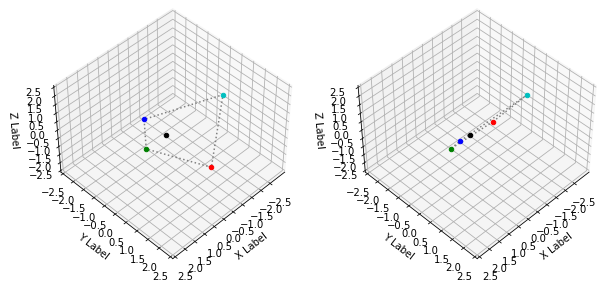

3D rotation  over Y-axis 60 degrees 



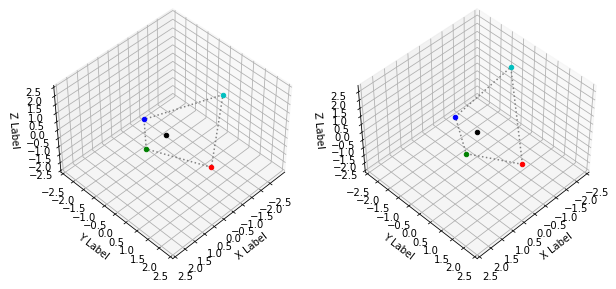

3D rotation  over Z-axis 60 degrees 



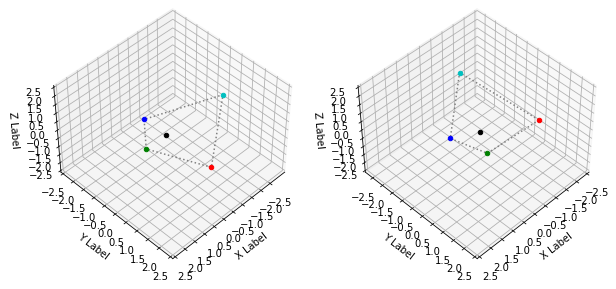

In [50]:

#3d rotation  over X-axis
print('3D rotation  over X-axis',angle,'degrees \n')
plot3d_points(A,P_rx)


#3d rotation  over Y-axis
print('3D rotation  over Y-axis',angle,'degrees \n')
plot3d_points(A,P_ry)



#3d rotation  over Z-axis
print('3D rotation  over Z-axis',angle,'degrees \n')
plot3d_points(A,P_rz)

### 3D scaling

The scaling matrix ($T_S$) in three dimensions is given by:

$$T_S = \left[
	\begin{array}{r r r}
		s_x & 0 & 0\\
		0 & s_y & 0 \\
        0 & 0 & s_z
	\end{array}
\right],$$

We define three 3D-points and a 3D scaling matrix and then plot the orginal and translated points. You can see how $s_x$, $s_y$, $s_z$ in scaling matrix affect the points in matrix $A$. 

3d Sacaling 
 [[2 0 0]
 [0 1 0]
 [0 0 3]]


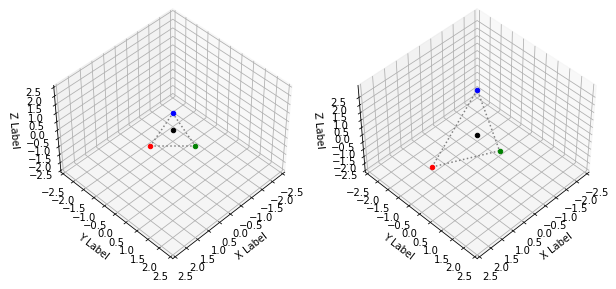

In [51]:
#  3d points 
a, b, c = (1, 0,0), (0, 1,0), (0, 0,1)


# matrix with row vectors of points
A = np.array([a, b, c]).T

#3d Sacaling  
T_3d_s=np.array([[2,0,0],[0,1,0],[0,0,3]])
print('3d Sacaling \n',T_3d_s)
P_3d_s=np.dot(T_3d_s,A)
plot3d_points(A,P_3d_s)

## Commutative property in 3D rotation
In general, the composition of 3D rotations is not commutative. Applying multiple general 3D rotations in different orderings generally results in different ending orientations.
In the code below you can see how differnt orderings of same rotations, will make different final rotations.

T_1=R_z*R_y*R_x


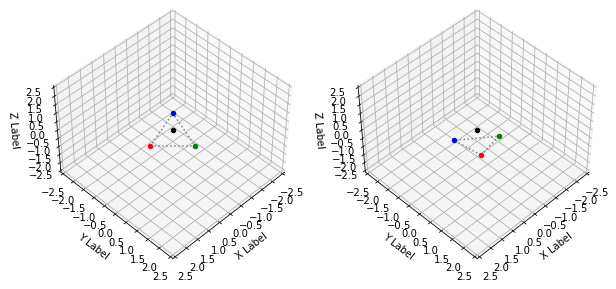

T_2=R_x*R_y*R_z


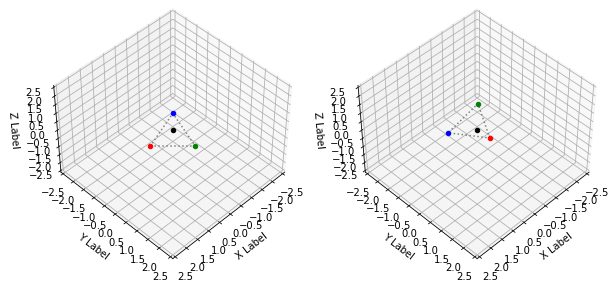

T_3=R_x*R_z*R_y


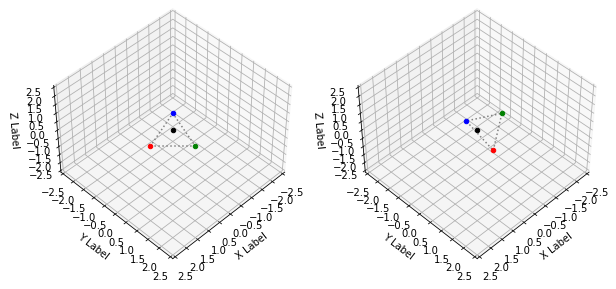

In [52]:
#Commutative property 
T_1=R_z.dot(R_y).dot(R_x)
T_2=R_x.dot(R_y).dot(R_z)
T_3=R_x.dot(R_z).dot(R_y)

print("T_1=R_z*R_y*R_x")
plot3d_points(A,np.dot(T_1,A))

print("T_2=R_x*R_y*R_z")
plot3d_points(A,np.dot(T_2,A))

print("T_3=R_x*R_z*R_y")
plot3d_points(A,np.dot(T_3,A))

However, if we compose 3D rotations around the same axis, it will also be commutative as in the 2D case. We will see this by using the code below.

T_1=R_x1*R_x2*R_x3


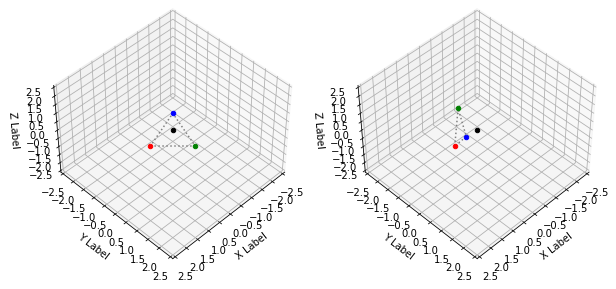

T_2==R_x2*R_x1*R_x3


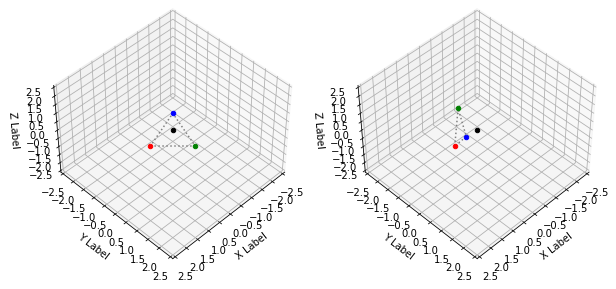

T_3==R_x3*R_x2*R_x1


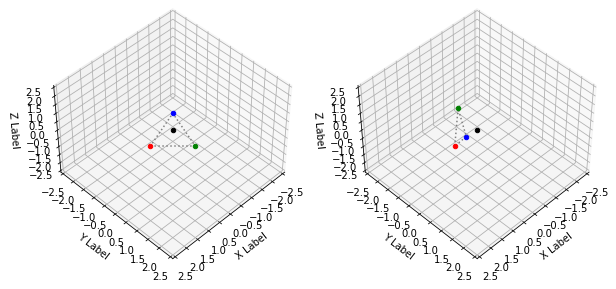

In [53]:
#Commutative property in rotations over the same axis
#3d rotation  over X-axis
angle_1=np.radians(30)
angle_2=np.radians(50)
angle_3=np.radians(70)
R_x1=get_3d_rotation_matrix(angle_1, axis=0)
R_x2=get_3d_rotation_matrix(angle_2, axis=0)
R_x3=get_3d_rotation_matrix(angle_3, axis=0)

#building different ordering of rotations 
T_1= R_x1.dot(R_x2).dot(R_x3)
T_2= R_x2.dot(R_x1).dot(R_x3)
T_3= R_x3.dot(R_x2).dot(R_x1)

print("T_1=R_x1*R_x2*R_x3")
plot3d_points(A,np.dot(T_1,A))

print("T_2==R_x2*R_x1*R_x3")
plot3d_points(A,np.dot(T_2,A))

print("T_3==R_x3*R_x2*R_x1")
plot3d_points(A,np.dot(T_3,A))

## Commutative property in translation and rotation in 2D    (introduction to affine transformation)

In the following codes you will see that a combination of translation and rotation does not have commutative property. 

Frist we define the matrix $A =\begin{bmatrix} 0 & 1 & 0 & -1\\
              1 & -1 & -1 & 0 \end{bmatrix}$  (where each column is considered a separate point) and apply roatation and then translation to them using the following codes. 

roatation and translation


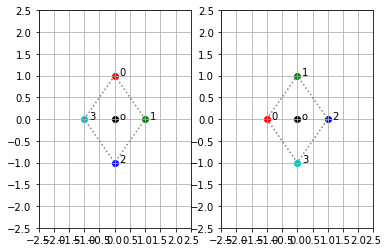

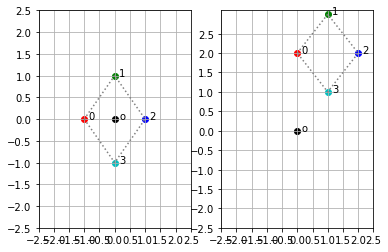

In [54]:
# points a, b, c and d
#
a, b, c, d = (0, 1), (1, 0), (0, -1), (-1, 0)


# matrix with row vectors of points
A = np.array([a, b, c, d]).T


#1- roatation and translation
print("roatation and translation")
T_t=np.array([[1],[2]])
T_r = np.array([[0, 1], [-1, 0]]).T
P_r=np.dot(T_r,A)
P_rt=P_r+T_t
plot_points(A,P_r)
plot_points(P_r,P_rt)



Now let apply translation and then roatation. You will see that the final output is different from previous transformation (rotation and then translation). 

translation then roatation


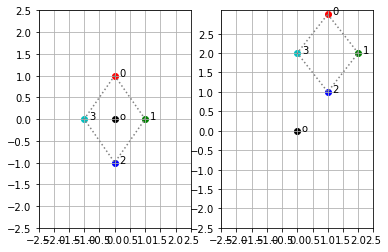

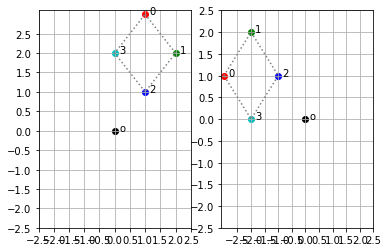

In [55]:
#2- translation and roatation
print("translation then roatation")

P_t=A+T_t
P_tr=np.dot(T_r,P_t)

plot_points(A,P_t)
plot_points(P_t,P_tr)

## Homogeneous coordinates
The following exampel illustrates a transformation(rotation and translation)  using homogeneous coordinates.

An  2D translation is defined as:

$$
T=\begin{bmatrix}\cos\theta&-\sin\theta & x_t\\\sin\theta& \cos\theta & y_t\\ 0&0&1\end{bmatrix}
$$

The transformation is then applied using the following calculation

$$
\begin{bmatrix}x'\\ y'\\1\end{bmatrix} = T\begin{bmatrix}x\\ y\\1\end{bmatrix}.
$$

Affine transformations necessitate the use of homogeneous coordinates to be used with generic matrix multiplication
methods. We therefore define the functions `to_homogeneous` and `to_euclidean` for easy conversion to and from
homogeneous coordinates.

In [56]:
def to_homogeneous(points):
    """Transform points to homogeneus coordinates."""
    return np.vstack((points, np.ones((1, points.shape[1]))))

def to_euclidean(points):
    """Transform homogeneus points to euclidean points."""
    return points[:2] / points[2]


  we convert ponits in matrix $A$ to  $H_A$  in homogeneous coordinates by using  `to_homogeneous`.

In [57]:
#Affine transformation (rotation nad translation)
print('points in euclidean coordinates \n',A)
H_A=to_homogeneous(A)
print('points in homogeneous coordinates \n',H_A)

points in euclidean coordinates 
 [[ 0  1  0 -1]
 [ 1  0 -1  0]]
points in homogeneous coordinates 
 [[ 0.  1.  0. -1.]
 [ 1.  0. -1.  0.]
 [ 1.  1.  1.  1.]]


In the following code we define the affine transformation $T_A$ and apply it to the converted points in matrix $H_A$ . 

$$
T_A=\begin{bmatrix}0 & -1 & 1 \\ 1 & 0 & 2 \\ 0 & 0 & 1\end{bmatrix}
$$

In [58]:


#Affine transformation (rotation then translation)
T_A=np.array([[0,1,0],[-1,0,0],[1,2,1]]).T
print('Affine transformation \n',T_A)
T_HA=np.dot(T_A,H_A)
print('transformed points in homogeneous coordinate \n',T_HA)


Affine transformation 
 [[ 0 -1  1]
 [ 1  0  2]
 [ 0  0  1]]
transformed points in homogeneous coordinate 
 [[0. 1. 2. 1.]
 [2. 3. 2. 1.]
 [1. 1. 1. 1.]]


Finally we convert the points in homogeneous coordinates $T_{HA}$ to euclidean coordinates by using `to_euclidean` and plot them.

transformed points in euclidean coordinates 
 [[0. 1. 2. 1.]
 [2. 3. 2. 1.]]


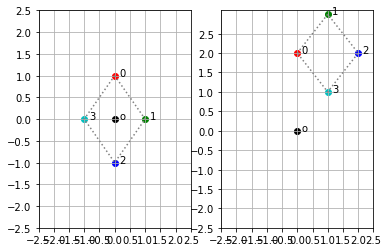

In [59]:
T_A=to_euclidean(T_HA)
print('transformed points in euclidean coordinates \n',T_A)
plot_points(A,T_A)

Notice that the transformed points using affine transformation ($T_A$) are exactly the same as points transofrmed by combination of roatation then translation ($P_{rt}$) in previous example.